<a href="https://colab.research.google.com/github/Ilham-0104/Machine_Learning_Data_Science/blob/main/Bag_3_pandas_Regression_ilham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd # manipulasi data
import numpy as np # numerical / math in python
import matplotlib.pyplot as plt # visualisasi data
import seaborn as sns # visualisasi data

In [ ]:
df = pd.read_csv("/content/house.csv")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
df.shape

(4600, 18)

In [ ]:
from sklearn import preprocessing # Data Preprocessing untuk menyesuaikan data dengan format regression

# 2. Exploratory Data Analysis (EDA)

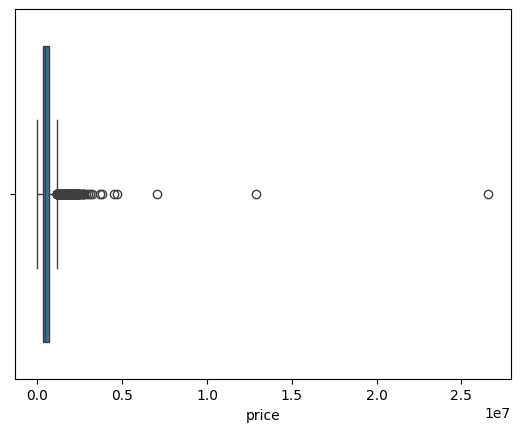

In [ ]:
# Visualkan rentang harga pada dataset

ax = sns.boxplot(x = df["price"])

<Axes: xlabel='price'>

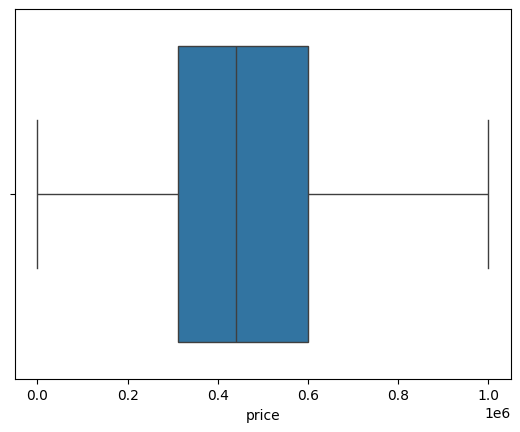

In [ ]:
# Data mengandung banyak outlier sehingga tidak representatif, jadi dilakukan filter data
data_filtered = df[df["price"] <= 1000000]
sns.boxplot(x = data_filtered["price"])

<Axes: xlabel='bedrooms', ylabel='price'>

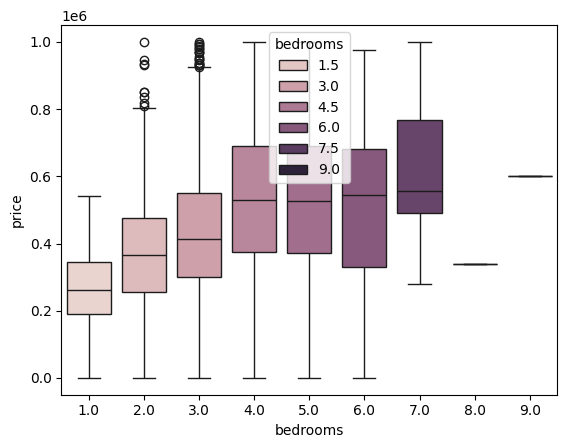

In [ ]:
# visualkan rentang harga berdasarkan jumlah bedrooms

sns.boxplot(x = "bedrooms",
            y = "price",
            data = data_filtered,
            hue = "bedrooms")

# Jumlah bedrooms mempengaruhi harga tetapi dari jumlah 4 - 6 harga stabil

In [ ]:
import plotly.express as px

fig = px.box(data_filtered,
             x = "price")

fig.show()

In [ ]:
round(data_filtered.describe(), 2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4260.00,4260.00,4260.00,4260.00,4260.00,4260.00,4260.00,4260.00,4260.00,4260.00,4260.00,4260.00,4260.00
mean,468074.15,3.35,2.08,2007.59,14307.53,1.49,0.00,0.17,3.44,1726.60,280.99,1970.72,814.61
std,203200.87,0.88,0.71,788.62,35574.93,0.54,0.06,0.64,0.67,743.84,419.85,29.42,980.54
min,0.00,1.00,0.75,370.00,638.00,1.00,0.00,0.00,1.00,370.00,0.00,1900.00,0.00
25%,312000.00,3.00,1.75,1420.00,5000.00,1.00,0.00,0.00,3.00,1170.00,0.00,1951.00,0.00
50%,440000.00,3.00,2.25,1900.00,7552.50,1.50,0.00,0.00,3.00,1520.00,0.00,1975.00,0.00
75%,600000.00,4.00,2.50,2480.00,10575.25,2.00,0.00,0.00,4.00,2160.00,550.00,1996.00,1999.00
max,1000000.00,9.00,6.25,8020.00,1074218.00,3.50,1.00,4.00,5.00,8020.00,2300.00,2014.00,2014.00


In [ ]:
fig = px.box(data_filtered,
             x = "bedrooms",
             y = "price",
             color = "bedrooms")

fig.show()

# 3. Data Preprocessing

In [ ]:
filtered_df = df[(df["price"] > 200000) & (df["price"] < 1000000)]
filtered_df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.000000,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2,2014-05-02 00:00:00,342000.000000,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.000000,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.000000,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.000000,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [ ]:
selected_featured = ["sqft_living",
                     "sqft_above",
                     "bathrooms",
                     "bedrooms",
                     "sqft_basement",
                     "floors",
                     "view",
                     "price"]

selected_data = filtered_df[selected_featured]

In [ ]:
selected_data.head()

,sqft_living,sqft_above,bathrooms,bedrooms,sqft_basement,floors,view,price
0,1340,1340,1.50,3.0,0,1.5,0,313000.0
2,1930,1930,2.00,3.0,0,1.0,0,342000.0
3,2000,1000,2.25,3.0,1000,1.0,0,420000.0
4,1940,1140,2.50,4.0,800,1.0,0,550000.0
5,880,880,1.00,2.0,0,1.0,0,490000.0


In [ ]:
# Pisahkan data features dan target
X = selected_data.iloc[:, :-1]
y = selected_data["price"]

In [ ]:
X

,sqft_living,sqft_above,bathrooms,bedrooms,sqft_basement,floors,view
0,1340,1340,1.50,3.0,0,1.5,0
2,1930,1930,2.00,3.0,0,1.0,0
3,2000,1000,2.25,3.0,1000,1.0,0
4,1940,1140,2.50,4.0,800,1.0,0
5,880,880,1.00,2.0,0,1.0,0
...,...,...,...,...,...,...,...
4595,1510,1510,1.75,3.0,0,1.0,0
4596,1460,1460,2.50,3.0,0,2.0,0
4597,3010,3010,2.50,3.0,0,2.0,0
4598,2090,1070,2.00,4.0,1020,1.0,0


In [ ]:
# Feature Scaling (Kompress range data agar tidak terlalu luas sehingga menyebabkan bias pada ML)
X = selected_data.iloc[:, :-1].values # mengubah menjadi format array Python
X

array([[1.34e+03, 1.34e+03, 1.50e+00, ..., 0.00e+00, 1.50e+00, 0.00e+00],
       [1.93e+03, 1.93e+03, 2.00e+00, ..., 0.00e+00, 1.00e+00, 0.00e+00],
       [2.00e+03, 1.00e+03, 2.25e+00, ..., 1.00e+03, 1.00e+00, 0.00e+00],
       ...,
       [3.01e+03, 3.01e+03, 2.50e+00, ..., 0.00e+00, 2.00e+00, 0.00e+00],
       [2.09e+03, 1.07e+03, 2.00e+00, ..., 1.02e+03, 1.00e+00, 0.00e+00],
       [1.49e+03, 1.49e+03, 2.50e+00, ..., 0.00e+00, 2.00e+00, 0.00e+00]])

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
X_scaled

array([[0.17352415, 0.20124481, 0.15      , ..., 0.        , 0.2       ,
        0.        ],
       [0.27906977, 0.32365145, 0.25      , ..., 0.        , 0.        ,
        0.        ],
       [0.29159213, 0.13070539, 0.3       , ..., 0.43478261, 0.        ,
        0.        ],
       ...,
       [0.47227191, 0.54771784, 0.35      , ..., 0.        , 0.4       ,
        0.        ],
       [0.30769231, 0.14522822, 0.25      , ..., 0.44347826, 0.        ,
        0.        ],
       [0.20035778, 0.23236515, 0.35      , ..., 0.        , 0.4       ,
        0.        ]])

In [ ]:
selected_featured[:-1]

['sqft_living',
 'sqft_above',
 'bathrooms',
 'bedrooms',
 'sqft_basement',
 'floors',
 'view']

In [ ]:
scaled_data = pd.DataFrame(X_scaled, columns = selected_featured[:-1]) # mengubah array python menjadi Pandas Dataframe

In [ ]:
scaled_data.head()

,sqft_living,sqft_above,bathrooms,bedrooms,sqft_basement,floors,view
0,0.173524,0.201245,0.15,0.250,0.000000,0.2,0.0
1,0.279070,0.323651,0.25,0.250,0.000000,0.0,0.0
2,0.291592,0.130705,0.30,0.250,0.434783,0.0,0.0
3,0.280859,0.159751,0.35,0.375,0.347826,0.0,0.0
4,0.091234,0.105809,0.05,0.125,0.000000,0.0,0.0


In [ ]:
X = scaled_data.values

y = selected_data["price"]

In [ ]:
# Split Data training and Testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

# 4. Modeling

In [ ]:
# Scikit Learn --> library Python untuk Machine Learning

# Linear Regression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
lin_reg_pred = lin_reg.predict(X_test) # membuat prediksi dari model linear regression

In [ ]:
from sklearn.svm import SVR # Support Vector Regressor

svm_reg = SVR()
svm_reg.fit(X_train, y_train)

SVR()

In [ ]:
svm_reg_pred = svm_reg.predict(X_test)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

dt_reg_pred = dt_reg.predict(X_test)

In [ ]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

rf_reg_pred = rf_reg.predict(X_test)

In [ ]:
prediction_results = pd.DataFrame({
    "Actual" : y_test,
    "Linear Regression" : lin_reg_pred,
    "Decision Tree Regressor" : dt_reg_pred,
    "Random Forest Regressor" : rf_reg_pred,
    "SVM" : svm_reg_pred
})

In [ ]:
prediction_results.head()

,Actual,Linear Regression,Decision Tree Regressor,Random Forest Regressor,SVM
1201,353250.0,386918.532507,402101.000000,381369.367500,454854.661595
1352,515000.0,655624.532507,725126.000000,687167.352241,455296.150096
3057,449000.0,427331.732507,268971.875000,327367.973214,454919.954115
1449,326000.0,420743.732507,382888.333333,528452.901212,454866.327004
3613,470000.0,415824.232507,373000.000000,502675.038462,454789.472845


# 5. Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

In [ ]:
pred_list = [lin_reg_pred, svm_reg_pred, dt_reg_pred, rf_reg_pred]
nama_list = ["Linear Regression", "SVM", "Decision Tree", "Random Forest"]

In [ ]:
# Mean Squared Error / MSE
for i, prediksi in enumerate(pred_list):
    print(i,nama_list[i], round((y_test, prediksi), 2))

0 Linear Regression 23580519469.7
1 SVM 37340752636.16
2 Decision Tree 41352818900.88
3 Random Forest 25281862508.94


In [ ]:
# Mean Absolute Error / MAE
for i, prediksi in enumerate(pred_list):
    print(nama_list[i], round(mean_absolute_error(y_test, prediksi), 2))

Linear Regression 122462.78
SVM 155902.14
Decision Tree 156917.15
Random Forest 125716.93


In [ ]:
# Mean Absolute Percentage Error / MAPE
for i, prediksi in enumerate(pred_list):
    print(nama_list[i], round(mean_absolute_percentage_error(y_test, prediksi), 2))

Linear Regression 0.29
SVM 0.35
Decision Tree 0.35
Random Forest 0.3
